<a href="https://colab.research.google.com/github/Viduthalaiselvi2106/UCDPA_ViduthalaiSelviGovindasamy/blob/main/GlobalEnergy_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                                         Global Energy Statistics
  

   **Production_data**

1.   Production_Coal.csv 
2.   Production_NaturalGas.csv
3.   Production_Petroleum.csv
4.   Production_Nuclear+renewables.csv
5.   Production_Total.csv  


   **Consumption_data**

1.   Consumption_Coal.csv
2.   Consumption_NaturalGas.csv
3.   Consumption_Petroleum.csv
4.   Consumption_Nuclear+renewables.csv
5.   Consumption_Total.csv 





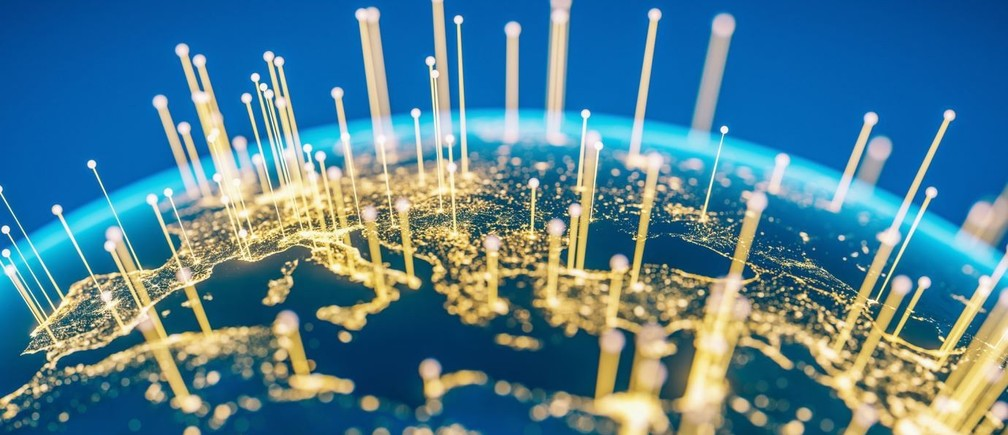

1.**Data Importing**






In [51]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Reading Production and Consumption Files

prod_dir='/content/drive/MyDrive/Energy Statistics/Production_Data/'
consump_dir='/content/drive/MyDrive/Energy Statistics/Consumption_Data/'

prod_coal = pd.read_csv(prod_dir+'Production_Coal.csv')
prod_gas=  pd.read_csv(prod_dir+'Production_NaturalGas.csv')
prod_petrol= pd.read_csv(prod_dir+'Production_Pertroleum.csv')
prod_nuclear=pd.read_csv(prod_dir+'Production_Nuclear+renewables.csv')
consump_coal= pd.read_csv(consump_dir+'Consumption_Coal.csv')
consump_gas= pd.read_csv(consump_dir+'Consumption_NaturalGas.csv')
consump_petrol= pd.read_csv(consump_dir+'Consumption_Petroleum.csv')
consump_nuclear= pd.read_csv(consump_dir+'Consumption_Neuclear+renewables.csv')
prod_total=pd.read_csv(prod_dir+'Production_Total.csv')
consump_total=pd.read_csv(consump_dir+'Consumption_Total.csv')

In [53]:
prod_total.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total_production
0,Africa,Algeria,2.803017355,3.03753686,3.224933779,3.606400483,3.859176003,3.907465538,3.968324779,4.218086334,...,6.510417691,6.561749872,6.696192523,6.910709728,6.830371007,6.755066467,6.474600013,5.972769931,6.656881917,238.118858
1,Africa,Angola,0.335098042,0.291293691,0.276262403,0.395407667,0.462550452,0.511269369,0.621432995,0.789428936,...,3.932204112,3.802528446,3.949946917,3.93529724,3.899020984,3.814151292,3.526638469,3.159336901,2.824017641,90.852722
2,Africa,Benin,in,0,0,0.00896,0.01573,0.01793,0.01793,0.01569,...,0.000019082,0.00001902,0.000055914,0.00009232,0.000055278,4.64E-05,7.18E-05,6.19E-05,7.07E-05,0.178363
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033334507,0.038240847,0.046562169,0.0419666,0.049654188,0.048447799,0.047231633,0.041991759,0.044392707,0.952582
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.001106756,0.00096051,0.000987814,0.00143096,0.001455654,0.002066608,0.00190567,0.001859876,0.002054882,0.033589


1.1 **Importing using SQL**

In [55]:
import sqlite3
import csv

db=sqlite3.connect("GlobalEnergy.db")
cursor=db.cursor()
cursor.execute('''CREATE TABLE Production(
               ID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
                COUNTRY TEXT NOT NULL,
                TOTAL FLOAT NOT NULL);''')


In [56]:
for i in range(len(prod_total)):

  cursor = db.execute("INSERT INTO Production (COUNTRY, TOTAL) VALUES('"+prod_total.at[i,'Country']+"','"    \
                      +str(prod_total.at[i,'Total_production'])+"')")

In [57]:
cursor =db.execute("SELECT * FROM Production;")
for row in cursor:
  print(row[0],row[1],row[2])

1         Algeria 238.118858
2         Angola 90.85272152
3         Benin 0.178363399
4         Botswana 0.952581997
5         Burkina Faso 0.033588856
6         Burundi 0.04624859
7         Cabo Verde 0.008767687
8         Cameroon 11.09423459
9         Central African Republic 0.043566652
10         Chad 5.296669815
11         Comoros 0.00103608
12         Congo-Brazzaville 19.75244769
13         Congo-Kinshasa 5.004832003
14         Côte d’Ivoire 4.430504464
15         Djibouti 6.56506e-05
16         Egypt 121.4936651
17         Equatorial Guinea 15.54026883
18         Eritrea 0.001168345
19         Eswatini 0.337628003
20         Ethiopia 1.679545561
21         Gabon 22.15922768
22         Gambia, The 0.000441669
23         Ghana 6.174141247
24         Guinea 0.200076311
25         Guinea-Bissau 0.000101727
26         Kenya 1.849630291
27         Lesotho 0.103649617
28         Liberia 0.031860994
29         Libya 127.2390106
30         Madagascar 0.221651884
31         Malawi 0.525

In [58]:
sql_df = pd.read_sql("SELECT * FROM Production",db)
sql_df.to_csv('Production.csv')
print(sql_df.head())

   ID               COUNTRY       TOTAL
0   1               Algeria  238.118858
1   2                Angola   90.852722
2   3                 Benin    0.178363
3   4              Botswana    0.952582
4   5          Burkina Faso    0.033589


In [59]:
db.close()

2. **Data** **Exploration**

In [60]:
prod_total.shape

(229, 45)

In [61]:
prod_total.info

<bound method DataFrame.info of                        Continent                           Country  \
0                         Africa                           Algeria   
1                         Africa                            Angola   
2                         Africa                             Benin   
3                         Africa                          Botswana   
4                         Africa                      Burkina Faso   
..                           ...                               ...   
224      Central & South America               Trinidad and Tobago   
225      Central & South America          Turks and Caicos Islands   
226      Central & South America               U.S. Virgin Islands   
227      Central & South America                           Uruguay   
228      Central & South America                         Venezuela   

            1980         1981         1982         1983         1984  \
0    2.803017355   3.03753686  3.224933779  3.606400483

In [62]:
prod_total.values

array([['    Africa', '        Algeria', '2.803017355', ...,
        '5.972769931', '6.656881917', 238.118858],
       ['    Africa', '        Angola', '0.335098042', ...,
        '3.159336901', '2.824017641', 90.85272152],
       ['    Africa', '        Benin', 'in', ..., '6.19E-05', '7.07E-05',
        0.178363399],
       ...,
       ['    Central & South America', '        U.S. Virgin Islands',
        '0', ..., '0.000122822', '0.000149843', 0.005366646],
       ['    Central & South America', '        Uruguay', '0.023362619',
        ..., '0.111706109', '0.119688284', 3.261444018],
       ['    Central & South America', '        Venezuela',
        '5.766783869', ..., '2.318537288', '2.500022335', 284.4110975]],
      dtype=object)

In [63]:
prod_total.describe()

,Total_production
count,229.000000
mean,79.280368
std,308.217753
min,0.000000
25%,0.039002
50%,2.272900
75%,27.855034
max,3149.020415


In [64]:
consump_total.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total_Consumption
0,Africa,Algeria,0.780695167,0.663391323,0.952188116,1.070561843,1.130786713,1.046418247,1.066300962,1.138318654,...,2.037584643,2.299888436,2.35214754,2.33598238,2.365986905,2.522119152,2.624873096,2.480810774,2.581123314,64.746181
1,Africa,Angola,0.058366148,0.057863688,0.062007899,0.066297007,0.059894701,0.073766696,0.072853256,0.075135479,...,0.347761278,0.382763726,0.39921871,0.364251517,0.347458949,0.359226946,0.404865374,0.402317536,0.328628418,7.403765
2,Africa,Benin,0.006526525,0.006574612,0.004640112,0.006731564,0.006673241,0.007698814,0.007501055,0.005942365,...,0.066471109,0.070275151,0.077723341,0.094785008,0.10051639,0.111506331,0.101325936,0.108653617,0.110194887,1.660207
3,Africa,Botswana,0.014748762,0.015462338,0.014427219,0.014460824,0.014444631,0.018865991,0.020060806,0.021144246,...,0.065375734,0.065661654,0.080008274,0.088008537,0.080969008,0.080276228,0.080755726,0.076835026,0.082892488,2.021542
4,Africa,Burkina Faso,0.0060363,0.006019807,0.006019807,0.006019807,0.0060363,0.005819147,0.006886218,0.007191413,...,0.0451141,0.042012755,0.053396002,0.051306252,0.05946458,0.066130673,0.067697934,0.064550875,0.068226015,0.988877


In [65]:
consump_total.index

RangeIndex(start=0, stop=230, step=1)

In [66]:
consump_total.values

array([['Africa', '        Algeria', '0.780695167', ..., '2.480810774',
        '2.581123314', 64.74618072],
       ['Africa', '        Angola', '0.058366148', ..., '0.402317536',
        '0.328628418', 7.403765332],
       ['Africa', '        Benin', '0.006526525', ..., '0.108653617',
        '0.110194887', 1.660207091],
       ...,
       ['Eurasia', '        Turkmenistan', '--', ..., '1.80034877',
        '1.89508569', 28.14087855],
       ['Eurasia', '        Ukraine', '--', ..., '3.454790016',
        '3.544386604', 167.5588521],
       ['Eurasia', '        Uzbekistan', '--', ..., '1.805319218',
        '1.925119154', 58.90210466]], dtype=object)

In [67]:
consump_total.describe()

,Total_Consumption
count,230.000000
mean,79.129864
std,337.588195
min,0.000000
25%,0.747999
50%,5.103923
75%,38.877648
max,3830.095107


In [68]:
prod_total.groupby(["Continent"])["Total_production"].agg(['min','max'])

,min,max
Continent,,
Africa,0.000000,238.118858
Asia & Oceania,0.000000,2620.639503
Central & South America,0.000000,294.823104
Eurasia,0.104255,1549.828759
Europe,0.000000,355.330260
Middle East,0.005926,905.009573
North America,0.000000,3149.020415


In [69]:
consump_total.groupby(["Continent"])["Total_Consumption"].agg(['min','max'])

,min,max
Continent,,
Africa,0.004458,192.697680
Asia & Oceania,0.000000,2953.320240
Central & South America,0.018534,351.277664
Eurasia,4.030892,894.408884
Europe,0.398382,437.349547
Middle East,1.122861,258.846097
North America,0.000000,3830.095107


2.1 **Manipulation**

In [70]:
#Adding a new column(Total_Consumption_percent) 
consump_total['Total_Consumption_percent']=consump_total['Total_Consumption']/max(consump_total['Total_Consumption'])*100
print(consump_total.head())

  Continent               Country         1980         1981         1982  \
0    Africa               Algeria  0.780695167  0.663391323  0.952188116   
1    Africa                Angola  0.058366148  0.057863688  0.062007899   
2    Africa                 Benin  0.006526525  0.006574612  0.004640112   
3    Africa              Botswana  0.014748762  0.015462338  0.014427219   
4    Africa          Burkina Faso    0.0060363  0.006019807  0.006019807   

          1983         1984         1985         1986         1987  ...  \
0  1.070561843  1.130786713  1.046418247  1.066300962  1.138318654  ...   
1  0.066297007  0.059894701  0.073766696  0.072853256  0.075135479  ...   
2  0.006731564  0.006673241  0.007698814  0.007501055  0.005942365  ...   
3  0.014460824  0.014444631  0.018865991  0.020060806  0.021144246  ...   
4  0.006019807    0.0060363  0.005819147  0.006886218  0.007191413  ...   

          2014         2015         2016         2017         2018  \
0  2.299888436   2.352

In [71]:
prod_total['Total_production'].median()

2.272899642

In [72]:
consump_total['Total_Consumption'].median()

5.103922818

In [73]:
prod_total.columns

Index(['Continent', 'Country', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Total_production'],
      dtype='object')

In [74]:
#Indexing
prod_total.loc[[0,130,228],["Continent","Country","Total_production"]]

,Continent,Country,Total_production
0,Africa,Algeria,238.118858
130,Asia & Oceania,India,421.527874
228,Central & South America,Venezuela,284.411097


In [75]:
#Slicing
#Selecting the production of resources in the year 1980 
prod_total.iloc[:,[1,2]]

,Country,1980
0,Algeria,2.803017355
1,Angola,0.335098042
2,Benin,in
3,Botswana,0.008262057
4,Burkina Faso,0
...,...,...
224,Trinidad and Tobago,0.5500347
225,Turks and Caicos Islands,0
226,U.S. Virgin Islands,0
227,Uruguay,0.023362619


3. **Cleansing** **Data**

In [76]:
prod_total.isnull().sum()

Continent           0
Country             0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
2014                0
2015                0
2016                0
2017                0
2018                0
2019                0
2020                0
2021                0
Total_production    0
dtype: int

In [77]:
#Replacing non-numerical values
t = set(prod_total.columns)
for w in t:
  prod_total[w]=prod_total[w].replace('--',0)
  prod_total[w]=prod_total[w].replace('in',0)

t = set(consump_total.columns)
for w in t:
  consump_total[w]=consump_total[w].replace('--',0)
  consump_total[w]=consump_total[w].replace('in',0)

In [78]:
prod_total.head()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total_production
0,Africa,Algeria,2.803017355,3.03753686,3.224933779,3.606400483,3.859176003,3.907465538,3.968324779,4.218086334,...,6.510417691,6.561749872,6.696192523,6.910709728,6.830371007,6.755066467,6.474600013,5.972769931,6.656881917,238.118858
1,Africa,Angola,0.335098042,0.291293691,0.276262403,0.395407667,0.462550452,0.511269369,0.621432995,0.789428936,...,3.932204112,3.802528446,3.949946917,3.93529724,3.899020984,3.814151292,3.526638469,3.159336901,2.824017641,90.852722
2,Africa,Benin,0,0,0,0.00896,0.01573,0.01793,0.01793,0.01569,...,0.000019082,0.00001902,0.000055914,0.00009232,0.000055278,4.64E-05,7.18E-05,6.19E-05,7.07E-05,0.178363
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033334507,0.038240847,0.046562169,0.0419666,0.049654188,0.048447799,0.047231633,0.041991759,0.044392707,0.952582
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.001106756,0.00096051,0.000987814,0.00143096,0.001455654,0.002066608,0.00190567,0.001859876,0.002054882,0.033589


In [79]:
prod_total.drop_duplicates()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total_production
0,Africa,Algeria,2.803017355,3.03753686,3.224933779,3.606400483,3.859176003,3.907465538,3.968324779,4.218086334,...,6.510417691,6.561749872,6.696192523,6.910709728,6.830371007,6.755066467,6.474600013,5.972769931,6.656881917,238.118858
1,Africa,Angola,0.335098042,0.291293691,0.276262403,0.395407667,0.462550452,0.511269369,0.621432995,0.789428936,...,3.932204112,3.802528446,3.949946917,3.93529724,3.899020984,3.814151292,3.526638469,3.159336901,2.824017641,90.852722
2,Africa,Benin,0,0,0,0.00896,0.01573,0.01793,0.01793,0.01569,...,0.000019082,0.00001902,0.000055914,0.00009232,0.000055278,4.64E-05,7.18E-05,6.19E-05,7.07E-05,0.178363
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033334507,0.038240847,0.046562169,0.0419666,0.049654188,0.048447799,0.047231633,0.041991759,0.044392707,0.952582
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.001106756,0.00096051,0.000987814,0.00143096,0.001455654,0.002066608,0.00190567,0.001859876,0.002054882,0.033589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Central & South America,Trinidad and Tobago,0.5500347,0.612443154,0.502477718,0.4846128,0.57551528,0.610607152,0.52843115,0.494887151,...,1.783162381,1.754011749,1.642887482,1.529335888,1.41271512,1.473662092,1.481847159,1.295505933,1.107440884,43.807634
225,Central & South America,Turks and Caicos Islands,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000009104,0.000008905,0.000008773,1.07E-05,0.000037
226,Central & South America,U.S. Virgin Islands,0,0,0,0,0,0,0,0,...,1.19E-05,6.83E-05,0.0001237,0.000123063,6.67E-05,0.000127456,0.00012467,0.000122822,0.000149843,0.005367
227,Central & South America,Uruguay,0.023362619,0.026341567,0.025309145,0.074849929,0.07342452,0.066693648,0.075388782,0.074870934,...,0.094341413,0.118104693,0.120003494,0.124726864,0.130897177,0.130534803,0.14205812,0.111706109,0.119688284,3.261444


In [80]:
#Replace the missing values using fillna()
import numpy as np
prod_total["Total_production"]=prod_total["Total_production"].fillna(prod_total["Total_production"].mean())
print(prod_total.head())

    Continent               Country         1980         1981         1982  \
0      Africa               Algeria  2.803017355   3.03753686  3.224933779   
1      Africa                Angola  0.335098042  0.291293691  0.276262403   
2      Africa                 Benin            0            0            0   
3      Africa              Botswana  0.008262057  0.008484744  0.009241913   
4      Africa          Burkina Faso            0            0            0   

          1983         1984         1985         1986         1987  ...  \
0  3.606400483  3.859176003  3.907465538  3.968324779  4.218086334  ...   
1  0.395407667  0.462550452  0.511269369  0.621432995  0.789428936  ...   
2      0.00896      0.01573      0.01793      0.01793      0.01569  ...   
3  0.008796519   0.00875198  0.009731845  0.010912138  0.010845329  ...   
4            0            0            0            0            0  ...   

          2013         2014         2015         2016         2017  \
0  6.51041

In [81]:
prod_total.reset_index(drop=True)

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total_production
0,Africa,Algeria,2.803017355,3.03753686,3.224933779,3.606400483,3.859176003,3.907465538,3.968324779,4.218086334,...,6.510417691,6.561749872,6.696192523,6.910709728,6.830371007,6.755066467,6.474600013,5.972769931,6.656881917,238.118858
1,Africa,Angola,0.335098042,0.291293691,0.276262403,0.395407667,0.462550452,0.511269369,0.621432995,0.789428936,...,3.932204112,3.802528446,3.949946917,3.93529724,3.899020984,3.814151292,3.526638469,3.159336901,2.824017641,90.852722
2,Africa,Benin,0,0,0,0.00896,0.01573,0.01793,0.01793,0.01569,...,0.000019082,0.00001902,0.000055914,0.00009232,0.000055278,4.64E-05,7.18E-05,6.19E-05,7.07E-05,0.178363
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033334507,0.038240847,0.046562169,0.0419666,0.049654188,0.048447799,0.047231633,0.041991759,0.044392707,0.952582
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.001106756,0.00096051,0.000987814,0.00143096,0.001455654,0.002066608,0.00190567,0.001859876,0.002054882,0.033589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Central & South America,Trinidad and Tobago,0.5500347,0.612443154,0.502477718,0.4846128,0.57551528,0.610607152,0.52843115,0.494887151,...,1.783162381,1.754011749,1.642887482,1.529335888,1.41271512,1.473662092,1.481847159,1.295505933,1.107440884,43.807634
225,Central & South America,Turks and Caicos Islands,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000009104,0.000008905,0.000008773,1.07E-05,0.000037
226,Central & South America,U.S. Virgin Islands,0,0,0,0,0,0,0,0,...,1.19E-05,6.83E-05,0.0001237,0.000123063,6.67E-05,0.000127456,0.00012467,0.000122822,0.000149843,0.005367
227,Central & South America,Uruguay,0.023362619,0.026341567,0.025309145,0.074849929,0.07342452,0.066693648,0.075388782,0.074870934,...,0.094341413,0.118104693,0.120003494,0.124726864,0.130897177,0.130534803,0.14205812,0.111706109,0.119688284,3.261444


In [82]:
consump_total.drop_duplicates()

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2014,2015,2016,2017,2018,2019,2020,2021,Total_Consumption,Total_Consumption_percent
0,Africa,Algeria,0.780695167,0.663391323,0.952188116,1.070561843,1.130786713,1.046418247,1.066300962,1.138318654,...,2.299888436,2.35214754,2.33598238,2.365986905,2.522119152,2.624873096,2.480810774,2.581123314,64.746181,1.690459
1,Africa,Angola,0.058366148,0.057863688,0.062007899,0.066297007,0.059894701,0.073766696,0.072853256,0.075135479,...,0.382763726,0.39921871,0.364251517,0.347458949,0.359226946,0.404865374,0.402317536,0.328628418,7.403765,0.193305
2,Africa,Benin,0.006526525,0.006574612,0.004640112,0.006731564,0.006673241,0.007698814,0.007501055,0.005942365,...,0.070275151,0.077723341,0.094785008,0.10051639,0.111506331,0.101325936,0.108653617,0.110194887,1.660207,0.043346
3,Africa,Botswana,0.014748762,0.015462338,0.014427219,0.014460824,0.014444631,0.018865991,0.020060806,0.021144246,...,0.065661654,0.080008274,0.088008537,0.080969008,0.080276228,0.080755726,0.076835026,0.082892488,2.021542,0.052780
4,Africa,Burkina Faso,0.0060363,0.006019807,0.006019807,0.006019807,0.0060363,0.005819147,0.006886218,0.007191413,...,0.042012755,0.053396002,0.051306252,0.05946458,0.066130673,0.067697934,0.064550875,0.068226015,0.988877,0.025819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Eurasia,Russia,0,0,0,0,0,0,0,0,...,31.36027357,30.9650754,31.02390028,31.26933107,32.39329874,32.597945,32.81496851,34.21033961,894.408884,23.352132
226,Eurasia,Tajikistan,0,0,0,0,0,0,0,0,...,0.215523806,0.215805158,0.222154268,0.226612228,0.241753209,0.256198715,0.254621103,0.255333992,6.796811,0.177458
227,Eurasia,Turkmenistan,0,0,0,0,0,0,0,0,...,1.440514209,1.758353822,1.754720561,1.737786661,1.740037773,1.771733624,1.80034877,1.89508569,28.140879,0.734731
228,Eurasia,Ukraine,0,0,0,0,0,0,0,0,...,4.383048096,3.845564092,3.771233197,3.684040518,3.747075892,3.543399757,3.454790016,3.544386604,167.558852,4.374796


In [83]:
#Sorting Total_production column in ascending order
prod_total.sort_values(['Total_production'],ascending=True)

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total_production
212,Central & South America,Montserrat,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
89,Europe,Gibraltar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
54,Africa,Western Sahara,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
128,Asia & Oceania,Hawaiian Trade Zone,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
41,Africa,Saint Helena,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Eurasia,Former U.S.S.R.,61.50664227,61.83394113,63.86297682,65.40147273,68.25201144,70.31066975,72.98506044,75.03424507,...,0,0,0,0,0,0,0,0,0,840.491586
174,Middle East,Saudi Arabia,22.4345476,22.43687764,15.10438402,11.92240067,11.29007879,8.641459725,12.03652458,10.84139532,...,26.96799549,27.16548104,28.14896434,29.1629507,28.49494623,29.18232028,27.86016529,26.6541115,26.58605537,905.009573
65,Eurasia,Russia,0,0,0,0,0,0,0,0,...,57.14160126,56.87277971,57.68467384,58.91392951,61.42991748,63.48174164,64.30301428,60.18159892,64.10330666,1549.828759
123,Asia & Oceania,China,19.53949852,19.3586248,20.4365534,21.85772896,23.91805068,26.2841124,27.06847254,28.0441804,...,113.412023,114.9168071,114.4000157,108.148124,112.0666486,118.0477756,123.8392488,127.0019925,134.9641885,2620.639503


In [84]:
 #Sorting Total_Consumption in ascending order
 consump_total.sort_values(['Total_Consumption'],ascending=True)

,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2014,2015,2016,2017,2018,2019,2020,2021,Total_Consumption,Total_Consumption_percent
88,Asia & Oceania,Northern Mariana Islands,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
170,North America,U.S. Territories,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,0.000000,0.000000
101,Asia & Oceania,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
86,Asia & Oceania,Niue,0.000042639,4.25E-05,4.25E-05,4.25E-05,0.000042639,4.35E-05,4.34E-05,4.34E-05,...,0.000100019,0.000108187,0.000104123,0.000101521,0.000105118,0.000110006,0.000104271,0.000107646,0.003029,0.000079
41,Africa,Saint Helena,4.63E-05,4.25E-05,4.25E-05,4.25E-05,0.000042639,4.35E-05,4.34E-05,8.84E-05,...,0.000147213,0.000134,0.000135,0.000144347,0.000135656,0.000183457,0.000175141,0.000184831,0.004458,0.000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Eurasia,Former U.S.S.R.,51.56998421,50.95051081,52.64340399,53.80084789,56.52287146,58.53154281,59.80096869,61.83636662,...,0,0,0,0,0,0,0,0,697.882262,18.221017
74,Asia & Oceania,Japan,15.80890506,15.7902113,15.27185632,15.05697956,16.0406037,16.07079464,16.17685209,16.58919819,...,19.78906408,19.37604842,19.40962604,19.4680122,19.27362643,18.94545382,17.71534896,18.12524194,827.270718,21.599221
225,Eurasia,Russia,0,0,0,0,0,0,0,0,...,31.36027357,30.9650754,31.02390028,31.26933107,32.39329874,32.597945,32.81496851,34.21033961,894.408884,23.352132
65,Asia & Oceania,China,19.10728811,18.96434707,19.93880095,21.28552081,23.05519742,24.35928861,25.02328892,26.37857921,...,137.5429448,137.0137091,137.8500651,142.1216816,147.2085185,151.8119852,156.0277625,165.1584142,2953.320240,77.108274


In [85]:
prod_total['Continent'].value_counts(normalize=True)

    Africa                     0.248908
    Asia & Oceania             0.213974
    Europe                     0.196507
    Central & South America    0.196507
    Middle East                0.061135
    Eurasia                    0.056769
    North America              0.026201
Name: Continent, dtype: float64

4. **Merging**

In [86]:
#Merging 3 dataframes containing production of Petroleum, Coal and Gas
prod_gas_petrol_coal=prod_gas.merge(prod_petrol, how='inner',on=['Continent','Country'], suffixes=['_Gas','_Petrol'])\
.merge(prod_coal, how='inner',on=['Continent','Country'])
print(prod_gas_petrol_coal.head())

  Continent               Country   1980_Gas   1981_Gas 1982_Gas  1983_Gas  \
0    Africa               Algeria    0.48498    0.91096  1.11156   1.55052   
1    Africa                Angola  0.0096324  0.0092136  0.01047  0.012564   
2    Africa                 Benin          0          0        0         0   
3    Africa              Botswana          0          0        0         0   
4    Africa          Burkina Faso          0          0        0         0   

   1984_Gas  1985_Gas  1986_Gas  1987_Gas  ...         2013         2014  \
0    1.6048    1.6048    1.5694    1.7995  ...            0            0   
1  0.012564  0.013611  0.014658  0.016752  ...            0            0   
2         0         0         0         0  ...            0            0   
3         0         0         0         0  ...  0.033315425  0.038212317   
4         0         0         0         0  ...            0            0   

          2015        2016         2017         2018         2019  \
0    

In [87]:
prod_gas_petrol_coal.drop_duplicates()

,Continent,Country,1980_Gas,1981_Gas,1982_Gas,1983_Gas,1984_Gas,1985_Gas,1986_Gas,1987_Gas,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Production_Coal
0,Africa,Algeria,0.48498,0.91096,1.11156,1.55052,1.6048,1.6048,1.5694,1.7995,...,0,0,0,0,0,0,0,0,0,0.000000
1,Africa,Angola,0.0096324,0.0092136,0.01047,0.012564,0.012564,0.013611,0.014658,0.016752,...,0,0,0,0,0,0,0,0,0,0.000000
2,Africa,Benin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,Africa,Botswana,0,0,0,0,0,0,0,0,...,0.033315425,0.038212317,0.046534212,0.04192044,0.049608123,0.048393175,0.047178203,0.041939121,0.044340069,0.952191
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Eurasia,Russia,--,--,--,--,--,--,--,--,...,8.278697649,8.503512861,8.847654395,9.136911534,9.83460667,10.40535561,10.5165844,9.651781076,10.49320504,219.834019
226,Eurasia,Tajikistan,--,--,--,--,--,--,--,--,...,0.011518171,0.019614024,0.023355691,0.03070744,0.039805965,0.043067401,0.045853221,0.047125639,0.048362639,0.373452
227,Eurasia,Turkmenistan,--,--,--,--,--,--,--,--,...,0,0,0,0,0,0,0,0,0,0.000000
228,Eurasia,Ukraine,--,--,--,--,--,--,--,--,...,1.595304388,1.116221029,0.831473632,0.758137448,0.579082374,0.621651065,0.613546304,0.566414839,0.581892258,42.807463


5. **Data Visualization**

5.1 **Analysing and Customizing Data**

In [88]:
#Distribution of Production
import plotly.express as px
fig = px.sunburst(prod_total, path=['Continent', 'Country'], values='Total_production',title="Distribution of Production Data")
fig.show()


In [89]:
#Distribution of Consumption 

fig = px.sunburst(consump_total, path=['Continent', 'Country'], values='Total_Consumption',title="Distribution of Consumption Data")
fig.show()


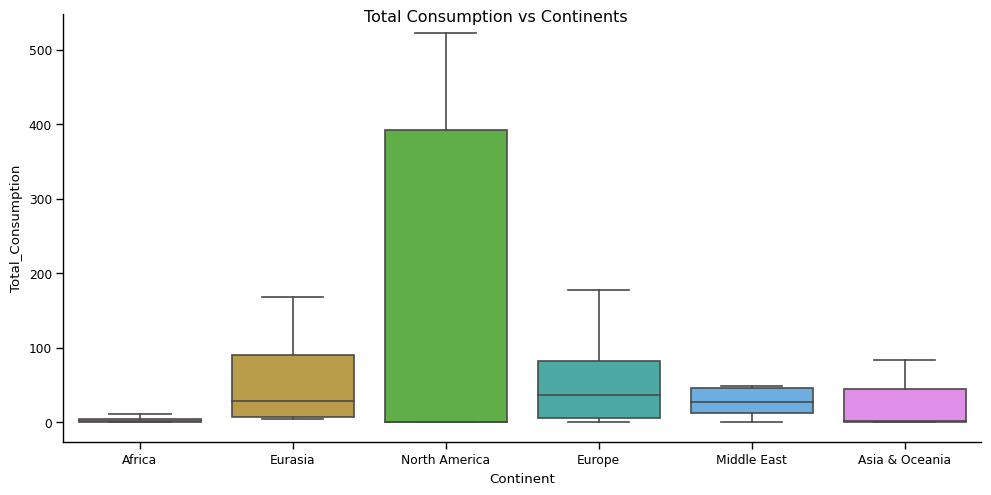

In [90]:
#Using Categorical plot(box plot)
plt.style.use("default")
custom_palette=["RED","BLUE","PURPLE","AQUA","MAGENTA"]
sns.set_palette(custom_palette)
sns.set_context("paper")
g=sns.catplot(x="Continent",y="Total_Consumption",data=consump_total,kind="box",sym="",order=["Africa","Eurasia","North America","Europe","Middle East","Asia & Oceania"],aspect=2)
g.fig.suptitle("Total Consumption vs Continents")
plt.show()




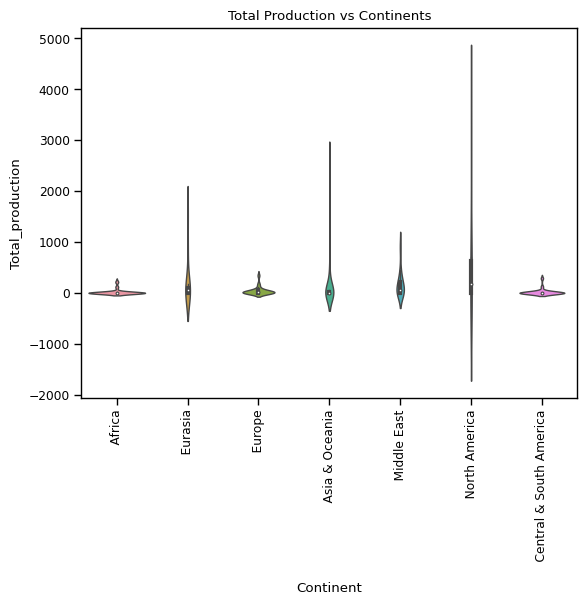

In [91]:
#violin plot against Total Production vs Continents

palet=["red","blue","yellow","magenta","purple"]
sns.set_palette(palet)
sns.violinplot(data=prod_total,x="Continent",y="Total_production",split=True,linewidth=1)
plt.rcParams["figure.figsize"]=[12,5]
plt.xticks(rotation=90)
plt.title("Total Production vs Continents")
plt.show()

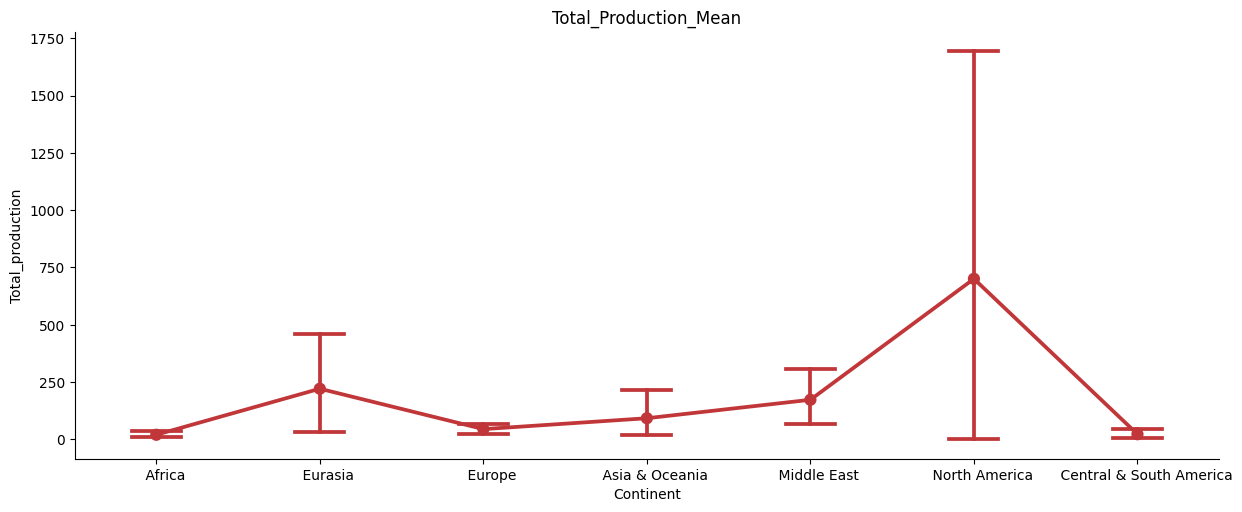

In [92]:
#Importing Mean from numpy
from numpy import mean
plt.style.use("default")
sns.set_palette("RdBu")
plt.rcParams["figure.figsize"]=[36,27]
#Displaying mean values using estimator
sns.catplot(x="Continent",y="Total_production",data=prod_total,kind="point",estimator=mean,capsize=0.3,aspect=2.5)
plt.title("Total_Production_Mean")
plt.show()



5.2 **Visualizing Production Data( Energy wise(Gas,Coal,Petrol))**

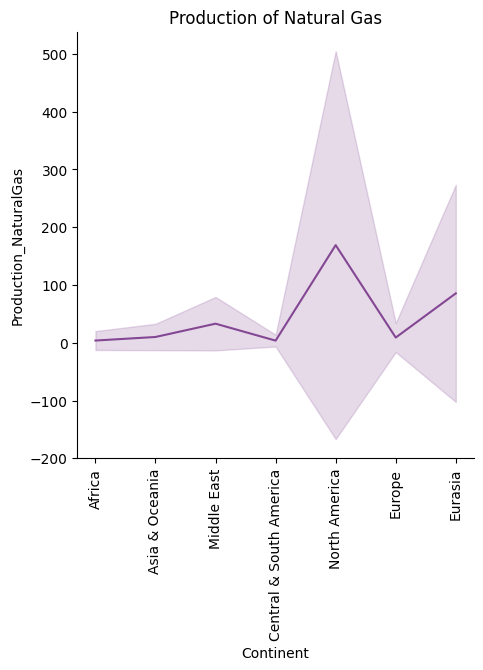

In [93]:
sns.set_palette("PRGn")
sns.relplot(data= prod_gas, x="Continent",y="Production_NaturalGas",kind="line",errorbar="sd")
plt.rcParams["figure.figsize"]=[47,14]
plt.xticks(rotation=90)
plt.title("Production of Natural Gas")
plt.show()

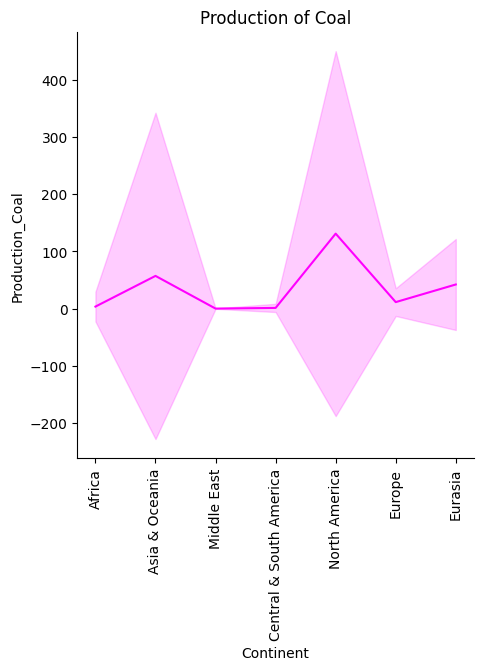

In [94]:
sns.relplot(data= prod_coal, x="Continent",y="Production_Coal",kind="line",errorbar="sd",color="magenta")
plt.rcParams["figure.figsize"]=[47,14]
plt.xticks(rotation=90)
plt.title("Production of Coal")
plt.show()

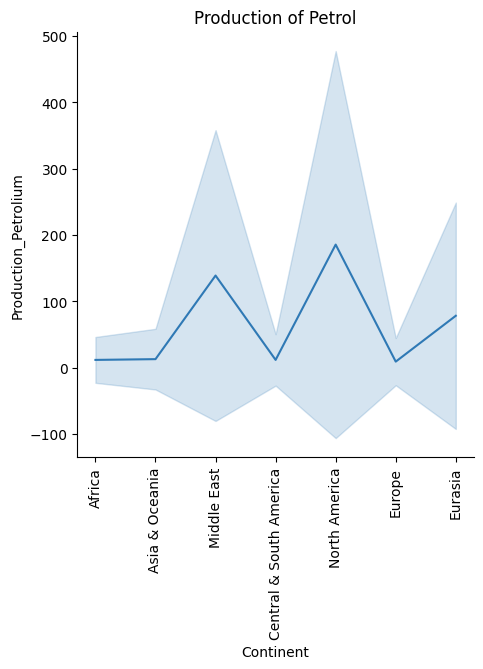

In [95]:
sns.set_palette("RdBu_r")
sns.relplot(data= prod_petrol, x="Continent",y="Production_Petrolium",kind="line",errorbar="sd")
plt.rcParams["figure.figsize"]=[47,14]
plt.xticks(rotation=90)
plt.title("Production of Petrol")
plt.show()

5.3 **Visualising Consumption data (Energy wise(Coal,Petrol,Gas))**

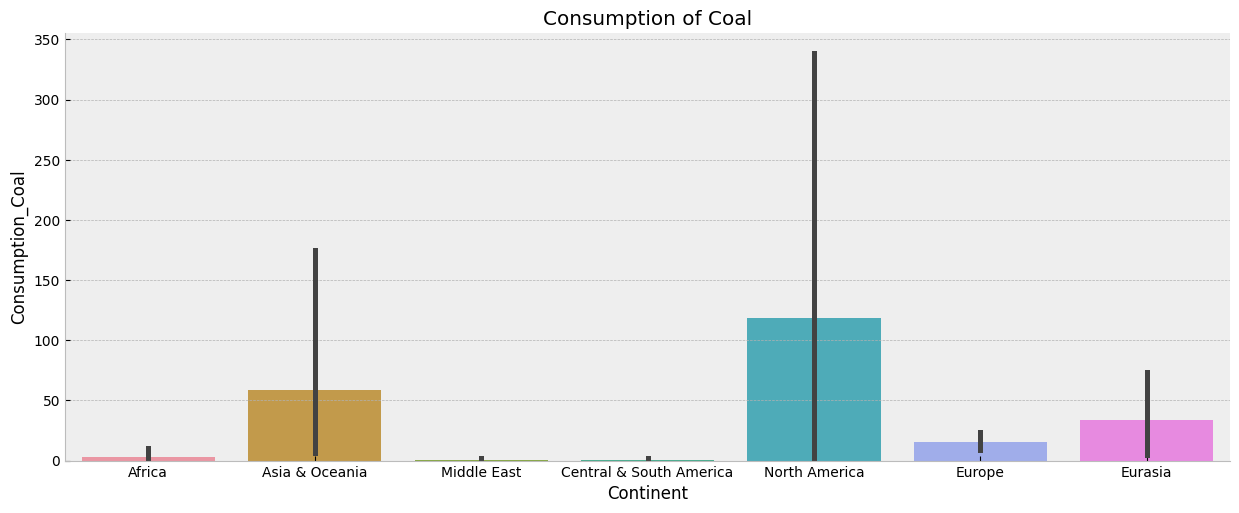

In [96]:
plt.style.use("bmh")
sns.set_palette("PRGn")
sns.catplot(x= "Continent",y="Consumption_Coal",kind="bar",data=consump_coal,aspect=2.5)
plt.rcParams["figure.figsize"]=[45,16]
plt.title("Consumption of Coal")
plt.show()




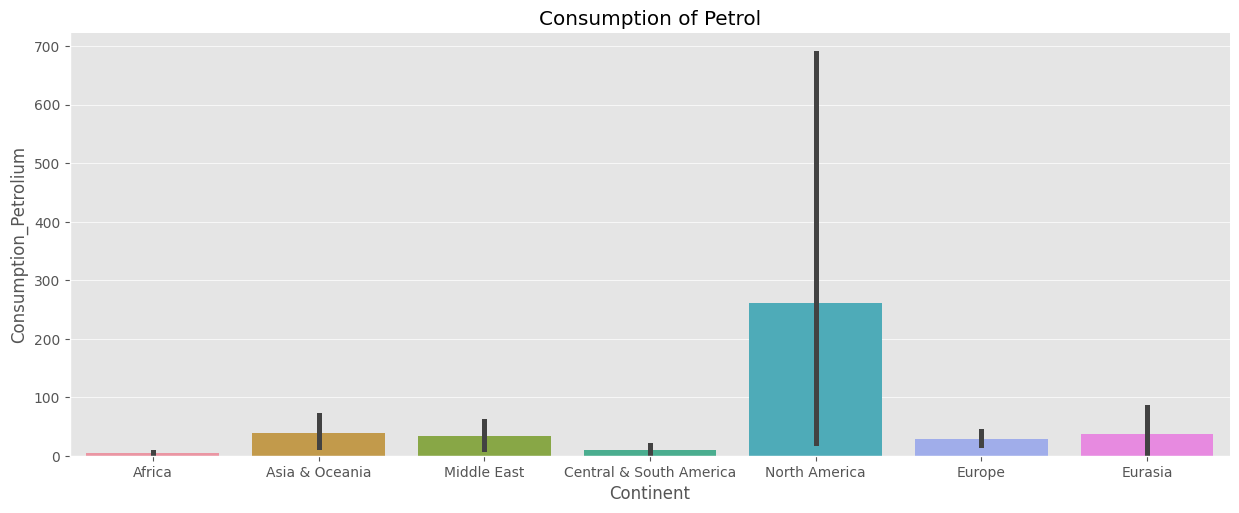

In [97]:
plt.style.use("ggplot")
sns.set_palette("Blues")
sns.catplot(x= "Continent",y="Consumption_Petrolium",kind="bar",data=consump_petrol,aspect=2.5)
plt.rcParams["figure.figsize"]=[30,14]
plt.title("Consumption of Petrol")
plt.show()

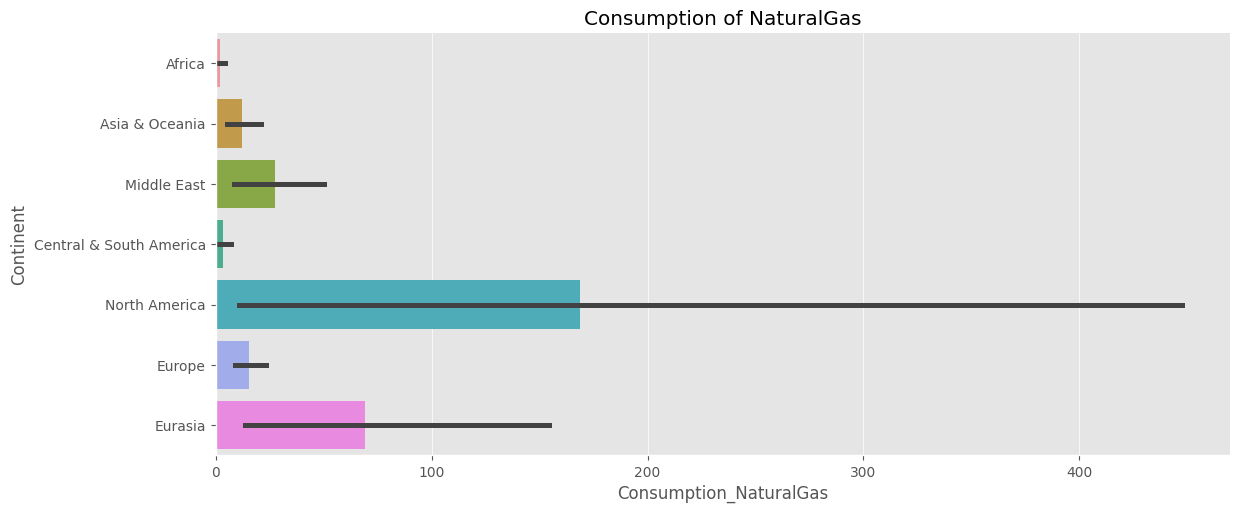

In [98]:
pal2=["blue","yellow","magenta","purple"]
sns.set_palette(pal2)
sns.catplot(x= "Consumption_NaturalGas",y="Continent",kind="bar",data=consump_gas,aspect=2.5)
plt.rcParams["figure.figsize"]=[25,14]
plt.title("Consumption of NaturalGas")
plt.show()

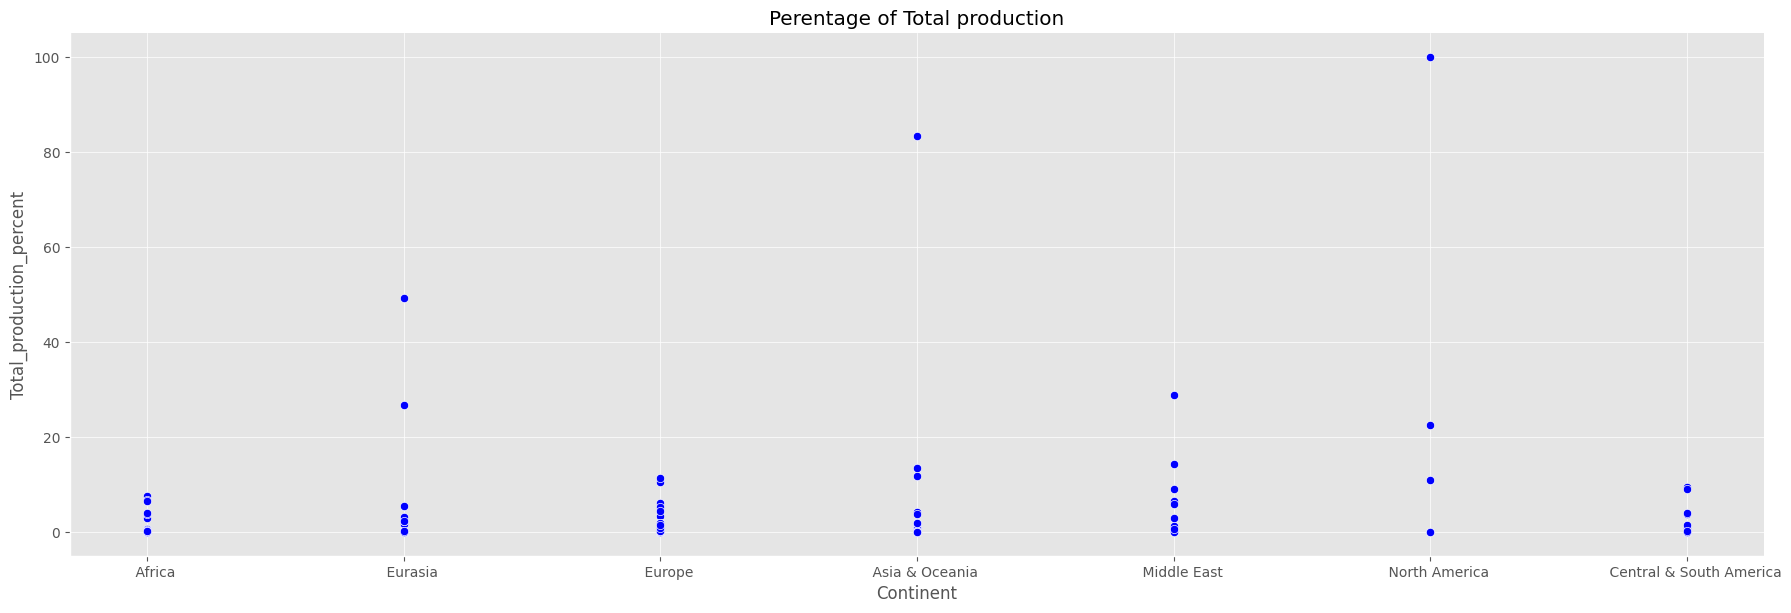

In [99]:
pal=["magenta","yellow","blue","purple"]
sns.color_palette(pal)
prod_total["Total_production_percent"]=prod_total['Total_production']/max(prod_total['Total_production'])*int(100)
sns.relplot(x="Continent",y="Total_production_percent",data=prod_total,kind="scatter",aspect=3,height=6)
plt.rcParams["figure.figsize"]=[16,11]
plt.title("Perentage of Total production")
plt.show()

5.4 **Comparison of Total Production with Total Consumption (Continent-wise)**

Text(0.5, 1.0, 'Total Production Vs Total Consumption')

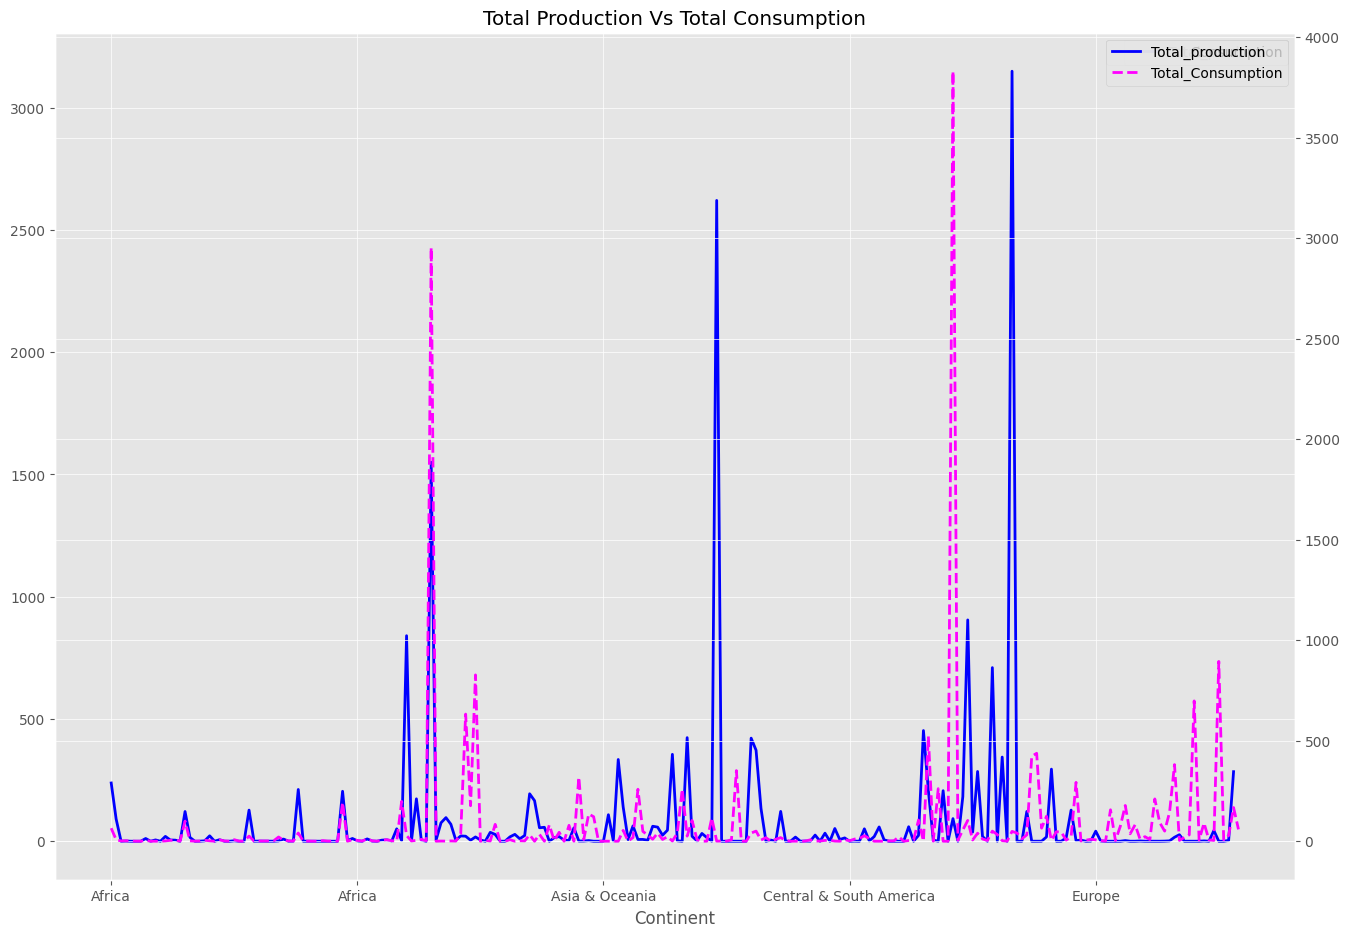

In [100]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.rcParams['figure.figsize']=[45,15]
prod_total.plot(x="Continent", y=["Total_production"], ax=ax)
consump_total.plot(x="Continent", y=["Total_Consumption"], ax=ax2, ls="--", color='MAGENTA')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.title('Total Production Vs Total Consumption')


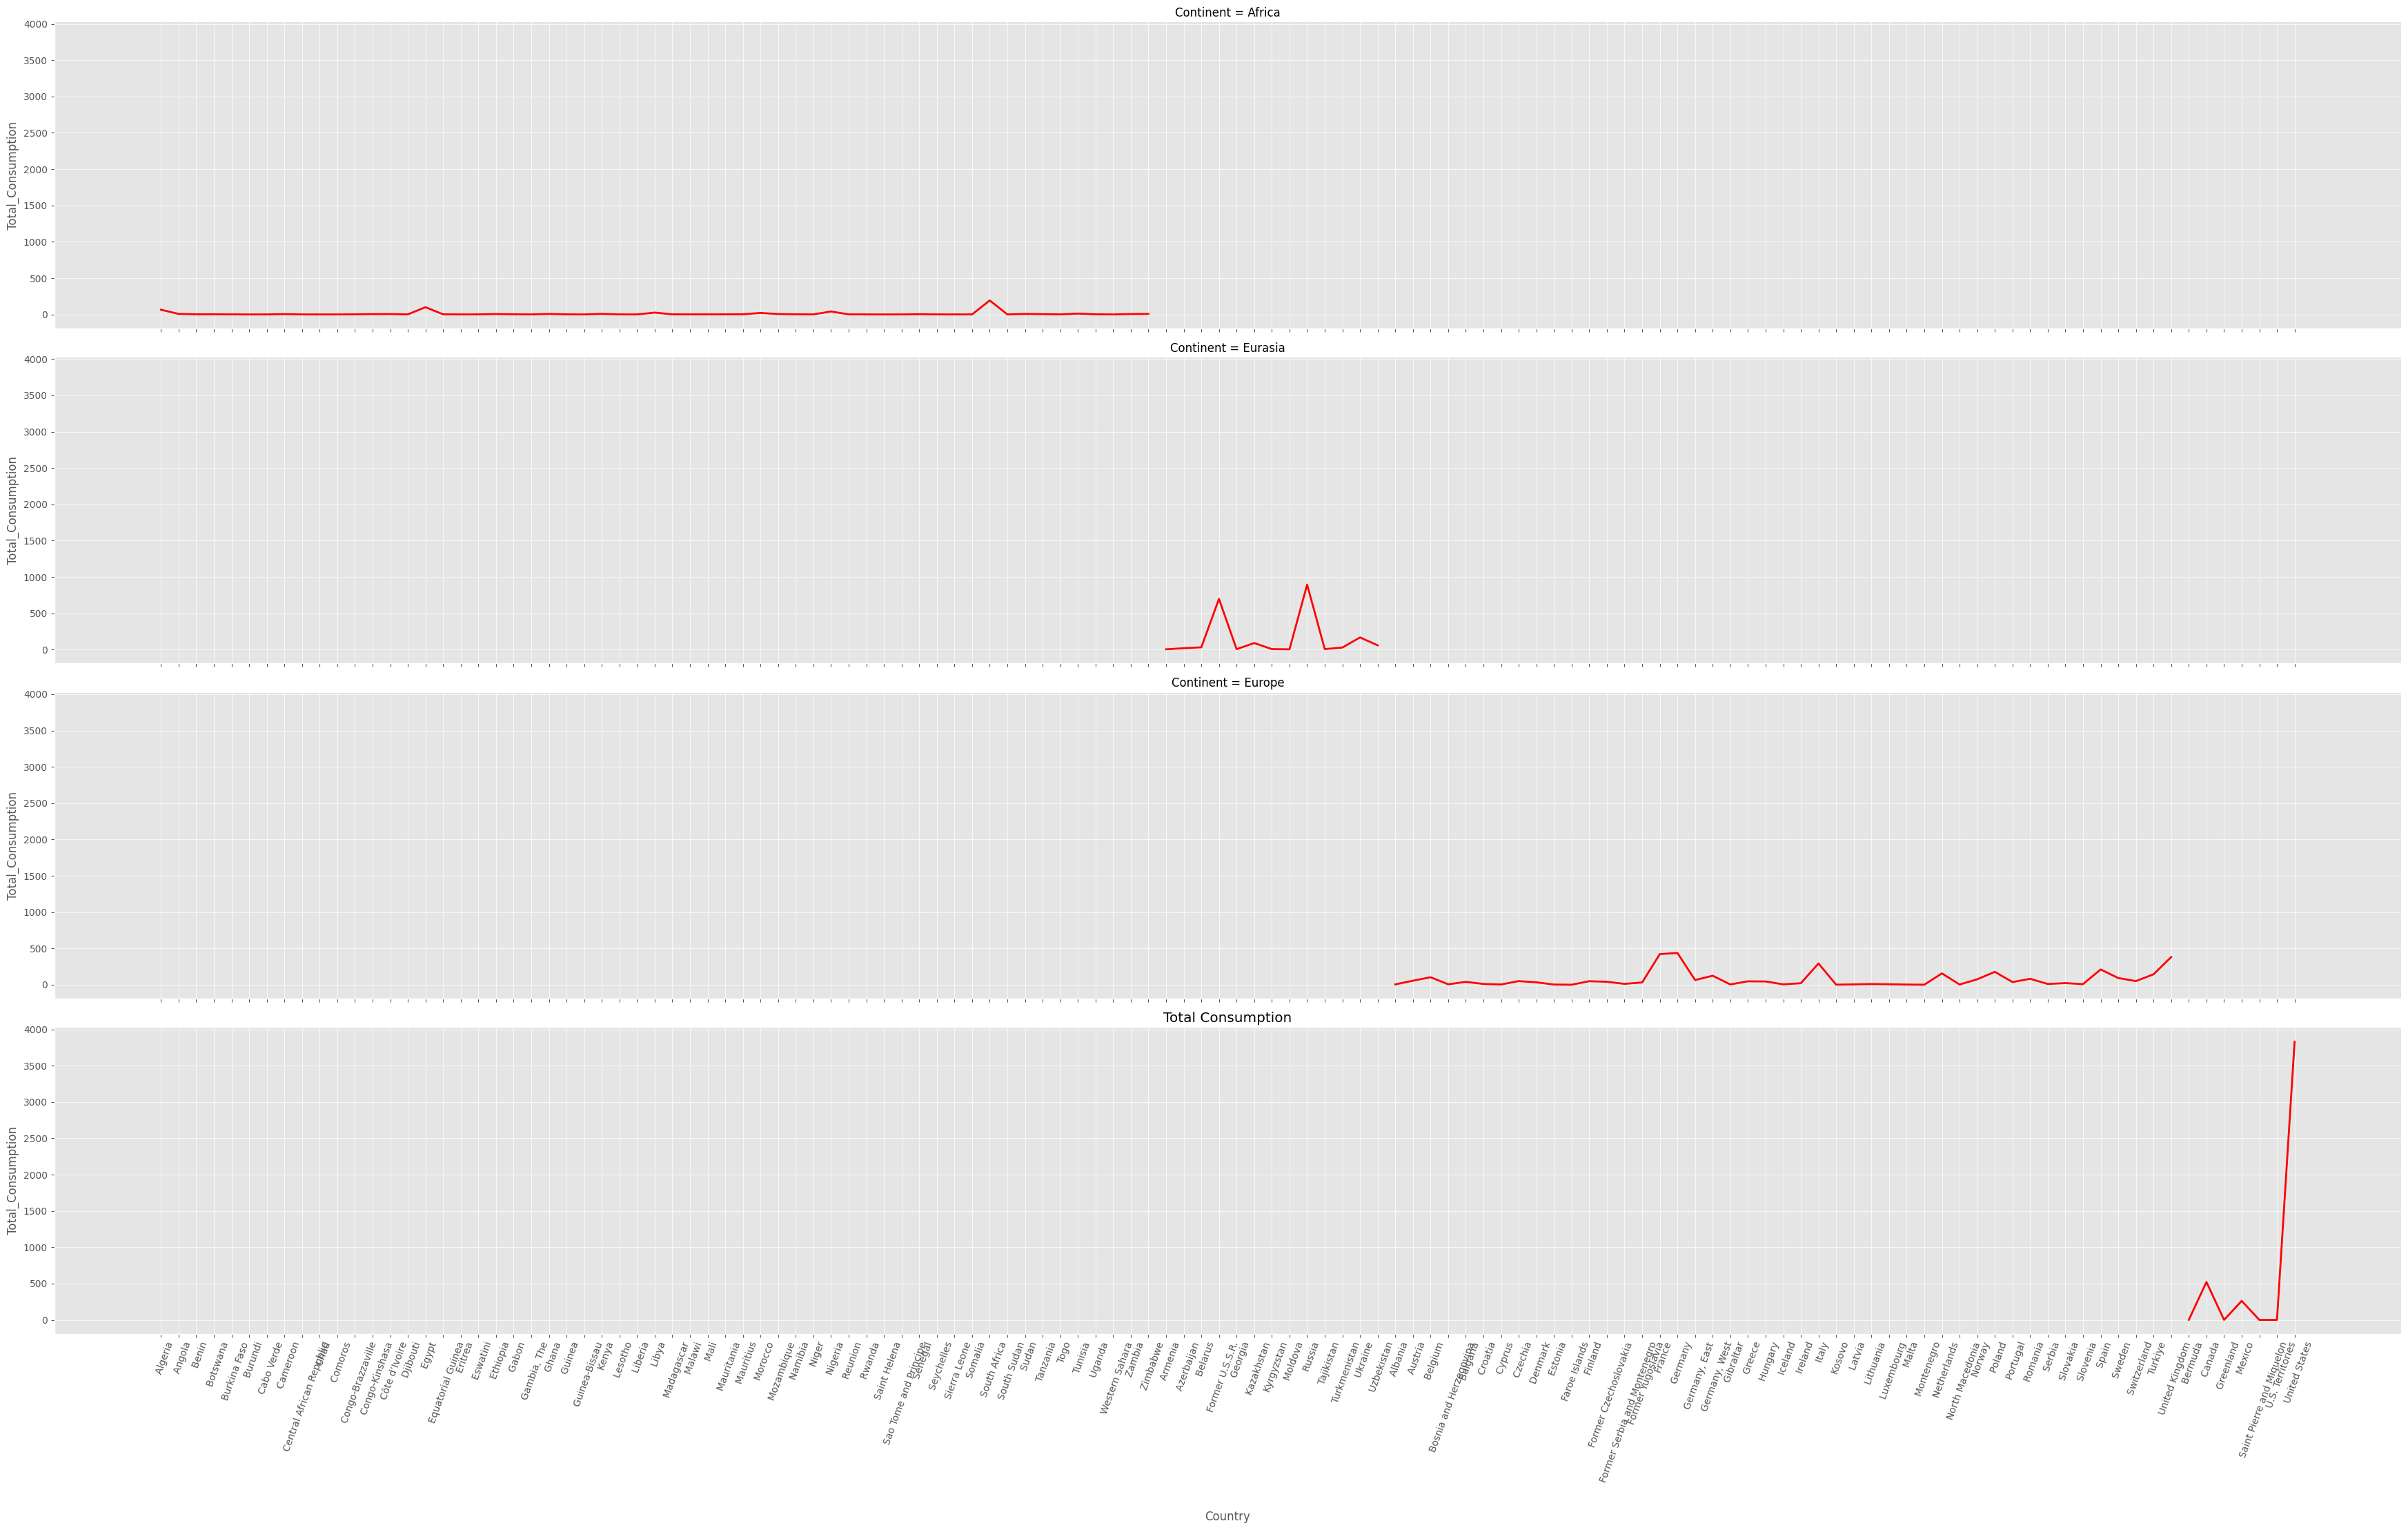

In [101]:
#Displaying the Coal production  using Relational plot(Line) Continent wise
sns.relplot(x="Country",y="Total_Consumption",data=consump_total,kind="line",col="Continent",col_wrap=1,col_order=["Africa","Eurasia","Europe","North America"],aspect=7,color="r")
plt.title("Total Consumption")
plt.xticks(rotation=70)
plt.rcParams["figure.figsize"]=[19,12]
plt.show()

6. **Data Modelling**

Pearson Correlation Coefficient:1.0


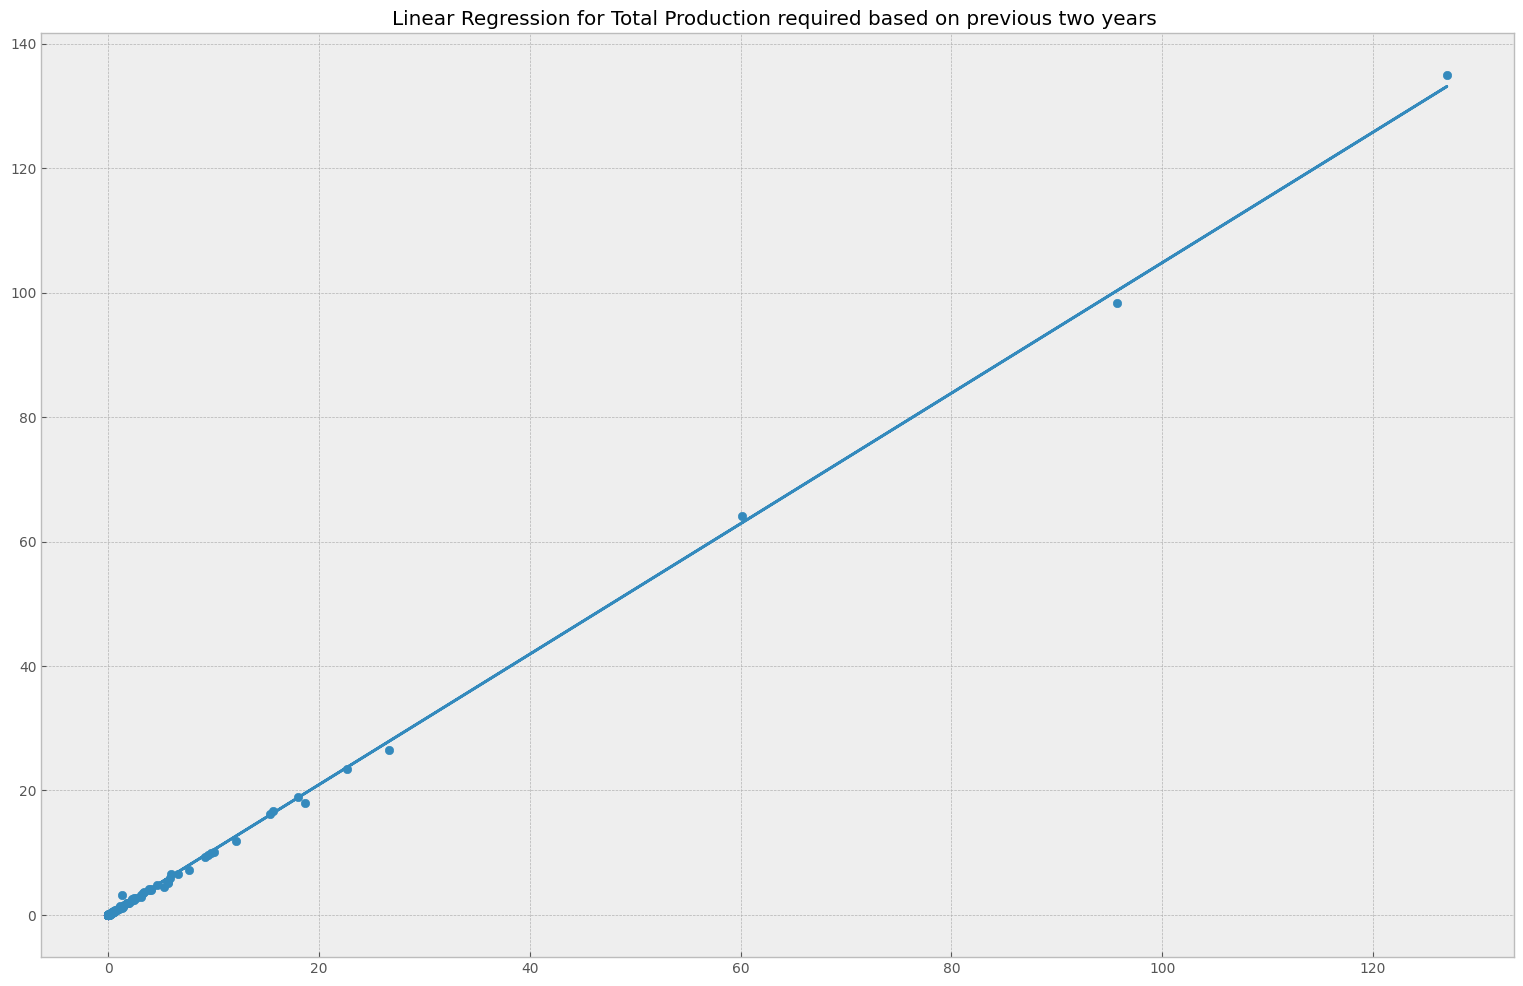

In [102]:
#Linear regression for Production data
plt.style.use("bmh")
from scipy import stats

prod_total['2020_r']=prod_total['2020'].astype(float)
prod_total['2021_r']=prod_total['2021'].astype(float)
x = prod_total["2020_r"].values
y = prod_total['2021_r'].values

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
print('Pearson Correlation Coefficient:'+str(round(r,2)))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.title("Linear Regression for Total Production required based on previous two years ")
plt.rcParams["figure.figsize"]=[10,7]
plt.show() 

Pearson Correlation Coefficient:1.0


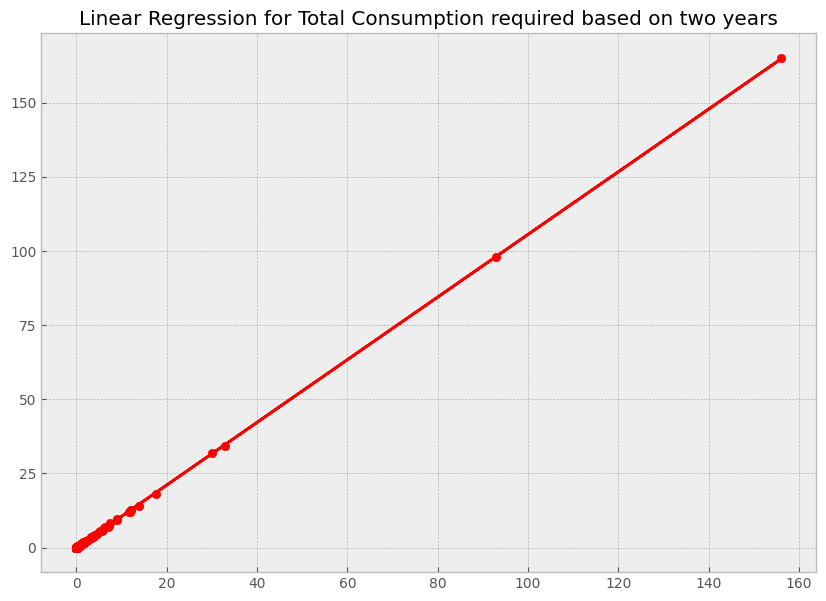

In [103]:
#Linear Regression for Consumption Data
pl=["red","blue","green"]
sns.set_palette(pl)
from scipy import stats

consump_total.dropna(how='any',inplace=True)
consump_total=consump_total.reset_index(drop=True)

consump_total['2020_r']=consump_total['2020'].astype(float)
consump_total['2021_r']=consump_total['2021'].astype(float)
x = consump_total["2020_r"].values
y = consump_total['2021_r'].values

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
print('Pearson Correlation Coefficient:'+str(round(r,2)))
plt.title("Linear Regression for Total Consumption required based on two years")
plt.show() 